<a href="https://colab.research.google.com/github/Venchislav/Stats-for-DS/blob/main/GlobalWarming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [57]:
df = pd.read_csv('/content/long_format_annual_surface_temp.csv')
df.head()

,Country,ISO2,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,F1961,-0.113
1,Albania,AL,F1961,0.627
2,Algeria,DZ,F1961,0.164
3,American Samoa,AS,F1961,0.079
4,"Andorra, Principality of",AD,F1961,0.736


In [58]:
df['Year'][0][1:]

'1961'

In [59]:
df['Year'] = df['Year'].apply(lambda x:x.replace('F','')).astype(int)

In [60]:
df

,Country,ISO2,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,1961,-0.113
1,Albania,AL,1961,0.627
2,Algeria,DZ,1961,0.164
3,American Samoa,AS,1961,0.079
4,"Andorra, Principality of",AD,1961,0.736
...,...,...,...,...
11217,West Bank and Gaza,PS,2022,1.074
11218,Western Sahara,EH,2022,1.970
11219,World,ZM,2022,1.394
11220,Zambia,ZM,2022,0.686


In [ ]:
df['ISO2'].head(100).plot(kind='bar')

<Axes: xlabel='Year'>

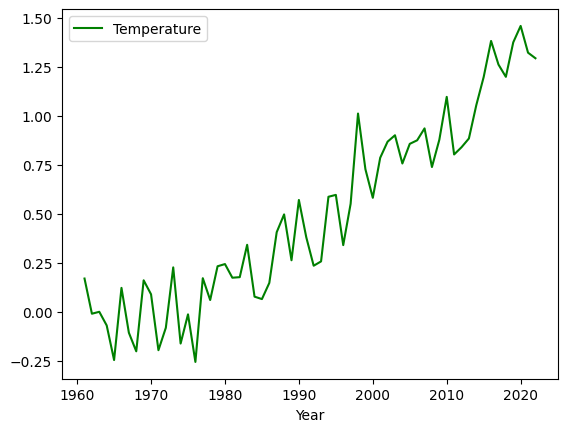

In [68]:
df.groupby('Year')['Temperature'].mean().plot(legend=True, color='Green')

<Axes: xlabel='Year'>

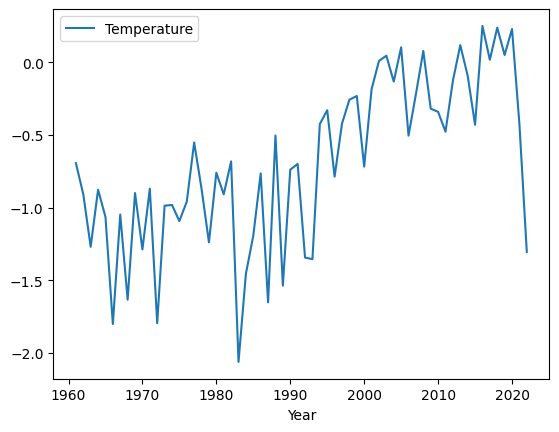

In [65]:
df.groupby('Year')['Temperature'].min().plot(legend=True,)

<Axes: xlabel='Year'>

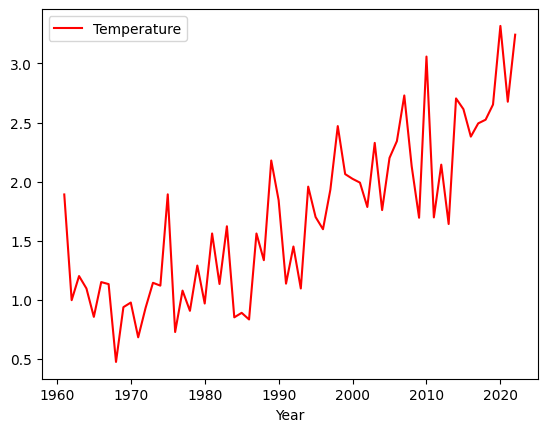

In [67]:
df.groupby('Year')['Temperature'].max().plot(legend=True, color='red')

In [81]:
# It's not my code, but it's soooooooooooo freakin' cool
# Animated plot with mean vals of temperature

fig = px.scatter(df.groupby('Year')[['Temperature']].mean().reset_index(),animation_frame='Year',x='Year',y='Temperature',range_y=[-3,3],range_x=[1961,2022], title='Mean temp')
fig.add_hrect(y0=-1, y1=0, line_width=0, fillcolor="blue", opacity=0.2)
fig.add_hrect(y0=0, y1=1, line_width=0, fillcolor="purple", opacity=0.2)
fig.add_hrect(y0=1, y1=2, line_width=0, fillcolor="red", opacity=0.2)

In [82]:
# same for min
fig = px.scatter(df.groupby('Year')[['Temperature']].min().reset_index(),animation_frame='Year',x='Year',y='Temperature',range_y=[-3,3],range_x=[1961,2022], title='Min temp')
fig.add_hrect(y0=-1, y1=0, line_width=0, fillcolor="blue", opacity=0.2)
fig.add_hrect(y0=0, y1=1, line_width=0, fillcolor="purple", opacity=0.2)
fig.add_hrect(y0=1, y1=2, line_width=0, fillcolor="red", opacity=0.2)

In [84]:
# and for max
fig = px.scatter(df.groupby('Year')[['Temperature']].min().reset_index(),animation_frame='Year',x='Year',y='Temperature',range_y=[-3,3],range_x=[1961,2022], title='Max temp')
fig.update_layout(height=500,width=1000)
fig.add_hrect(y0=-1, y1=0, line_width=0, fillcolor="blue", opacity=0.2)
fig.add_hrect(y0=0, y1=1, line_width=0, fillcolor="purple", opacity=0.2)
fig.add_hrect(y0=1, y1=2, line_width=0, fillcolor="red", opacity=0.2)

In [86]:
fig = px.bar(df.sort_values(by='Temperature',ascending=False).groupby('Year').head().sort_values(by=['Year', 'Temperature'],ascending=[True, True]),x='Temperature',y='ISO2',animation_frame='Year',range_x=[0, 4],text='Country')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 700
fig

<BarContainer object of 4 artists>

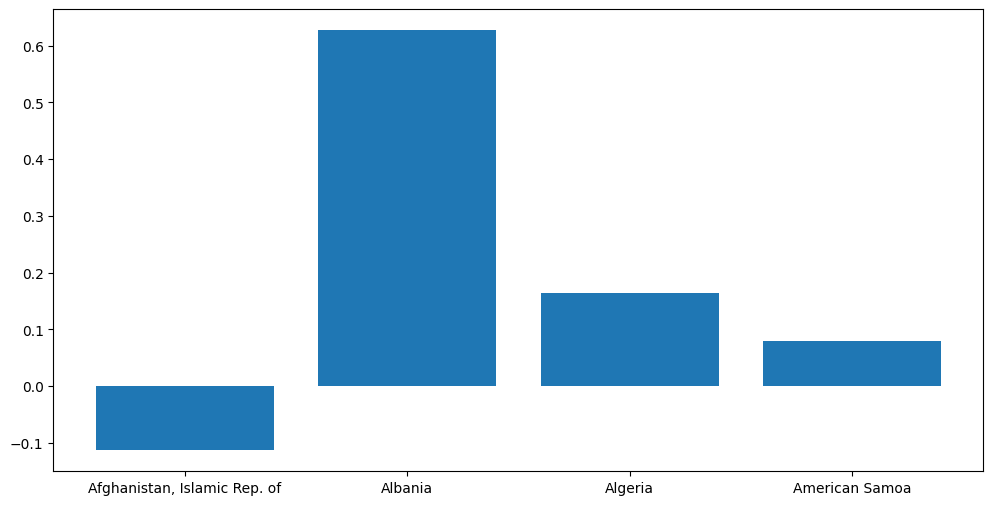

In [94]:
plt.figure(figsize=(12, 6))
plt.bar(df['Country'][:4], df['Temperature'][:4])